In [39]:
"""Following codes are originally from 
https://towardsdatascience.com/eigenfaces-recovering-humans-from-ghosts-17606c328184;
https://gist.github.com/n0acar/5a75dbfec2f0836426a7997296d6d19e#file-image_visualisation-py with modifications"""

import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image #python imaging library
import pandas as pd

In [40]:
"""It helps visualising the portraits from the dataset."""
def plot_portraits(images, titles, h, w, n_row, n_col, channel):
    plt.figure(figsize=(2.2 * n_col, 2.2 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i], cmap=plt.get_cmap(channel))
        plt.title(titles[i])
        plt.xticks(())
        plt.yticks(())

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
os.listdir("/content/drive/MyDrive/CS_3220_Final_Project/Code/")

['processor.ipynb',
 'lfwcrop_grey',
 'lfwcrop_color',
 'k-means-example.ipynb',
 'eigenfaces.ipynb',
 'eigenfaces_color.ipynb',
 '100 of eigenfaces_colorrgbseparated.ipynb',
 '300 of eigenfaces_colorrgbseparated.ipynb',
 '150 of 100 of eigenfaces_colorrgbseparated.ipynb',
 '200 of eigenfaces_colorrgbseparated.ipynb',
 'Copy of eigenfaces_colorrgbseparated.ipynb',
 'eigenfaces_colorrgbseparated.ipynb',
 'Final version eigenfaces_colorrgbseparated.ipynb',
 'lra of Final version eigenfaces_colorrgbseparated.ipynb']

In [49]:
dir = '/content/drive/MyDrive/CS_3220_Final_Project/Code/lfwcrop_color/faces'
celebrity_photos=os.listdir(dir)[1:13201]
celebrity_images=[dir+'/' + photo for photo in celebrity_photos]
#images=np.array([np.asarray(Image.open(image)) for image in celebrity_images], dtype=np.float64)
images = []
for i in range(len(celebrity_images)):
  images.append(np.asarray(Image.open(celebrity_images[i])))
celebrity_names=[name[:name.find('0')-1].replace("_", " ") for name in celebrity_photos]
n_samples = len(images)

In [6]:
def lowrank(img):
    U, s, V = np.linalg.svd(img)
    rank = np.linalg.matrix_rank(img, tol=None)
    approx_rank = 20
    S = np.diag(s)
    approx_img = np.dot(
    U[:, 0:approx_rank],
        np.dot(
            S[0:approx_rank, 0:approx_rank],
            V[0:approx_rank, :]))
    return approx_img

def split23(images):
  rset = []
  gset = []
  bset = []
  rsetl = []
  gsetl = []
  bsetl = []
  for i in range(len(images)):
    im = Image.Image.split(Image.open(celebrity_images[i]))
    rset.append(np.asarray(im[0]))
    gset.append(np.asarray(im[1]))
    bset.append(np.asarray(im[2]))
    rsetl.append(np.asarray(lowrank(im[0])))
    gsetl.append(np.asarray(lowrank(im[1])))
    bsetl.append(np.asarray(lowrank(im[2])))
  return rset, gset, bset, rsetl, gsetl, bsetl


In [7]:

  
def pca(X, n_pc):
    n_samples, n_features = X.shape
    mean = np.mean(X, axis=0)
    centered_data = X-mean
    U, S, V = np.linalg.svd(centered_data)
    components = V[:n_pc]
    projected = U[:,:n_pc]*S[:n_pc]
    return projected, components, mean, centered_data
 

In [8]:
def reconstruction(Y, C, M, h, w, image_index):
    n_samples, n_features = Y.shape
    weights = np.dot(Y, C.T)
    centered_vector=np.dot(weights[image_index, :], C)
    recovered_image=(M+centered_vector).reshape(h, w)
    return recovered_image

In [9]:
def eigenfacesrgb(rset, gset, bset):
  arrimagesr = np.array(rset)
  rX = arrimagesr.reshape(n_samples, h*w)
  rP, rC, rM, rY= pca(rX, n_pc=n_components)
  reigenfaces = rC.reshape((n_components, h, w))
  #reigenface_titles = ["eigenface %d" % i for i in range(reigenfaces.shape[0])]
  #plot_portraits(reigenfaces, reigenface_titles, h, w, 4, 4,channel="Reds") 
  arrimagesg = np.array(gset)
  gX = arrimagesg.reshape(n_samples, h*w)
  gP, gC, gM, gY= pca(gX, n_pc=n_components)
  geigenfaces = gC.reshape((n_components, h, w))
  #geigenface_titles = ["eigenface %d" % i for i in range(geigenfaces.shape[0])]
  #plot_portraits(geigenfaces, geigenface_titles, h, w, 4, 4,channel="Greens") 
  arrimagesb = np.array(bset)
  bX = arrimagesb.reshape(n_samples, h*w)
  bP, bC, bM, bY= pca(bX, n_pc=n_components)
  beigenfaces = bC.reshape((n_components, h, w))
  #beigenface_titles = ["eigenface %d" % i for i in range(beigenfaces.shape[0])]
  #plot_portraits(beigenfaces, beigenface_titles, h, w, 4, 4,channel="Blues") 
  return reigenfaces,geigenfaces,beigenfaces, rY, rC, rM, gY, gC, gM,bY, bC, bM

In [50]:
def recoveredrgb(rY, rC, rM, gY, gC, gM,bY, bC, bM,h,w):
  print("here1")
  rrecovered_images=[reconstruction(rY, rC, rM, h, w, i) for i in range(100)]#range(len(images))]
  #plot_portraits(rrecovered_images, celebrity_names, h, w, n_row=4, n_col=4, channel="Reds")
  print("here2")
  grecovered_images=[reconstruction(gY, gC, gM, h, w, i) for i in range(100)]#range(len(images))]
  #plot_portraits(grecovered_images, celebrity_names, h, w, n_row=4, n_col=4, channel="Greens")
  print("here2")
  brecovered_images=[reconstruction(bY, bC, bM, h, w, i) for i in range(100)]#range(len(images))]
  #plot_portraits(brecovered_images, celebrity_names, h, w, n_row=4, n_col=4, channel="Blues")
  return rrecovered_images, grecovered_images, brecovered_images

In [ ]:
#print(rM,gM,bM)
#plot_portraits([brecovered_images[0]], [celebrity_names[0]], h, w, n_row=1, n_col=1, channel="Blues")

In [11]:
# def justrgb(rrecovered_images,grecovered_images,brecovered_images,h,w):
#   justr = np.asarray(rrecovered_images).reshape(len(rrecovered_images)*h*w)
#   justg = np.asarray(grecovered_images).reshape(len(grecovered_images)*h*w)
#   justb = np.asarray(brecovered_images).reshape(len(brecovered_images)*h*w)
#   return justr, justg, justb
# def minrgb(justr, justg, justb):
#   minr = min(justr)
#   ming = min(justg)
#   minb = min(justb)
#   return minr, ming, minb
# def scalergb(justr, justg, justb,minr, ming, minb):
#   scalr = 255/(max(justr) - minr)
#   scalg = 255/(max(justg) - ming)
#   scalb = 255/(max(justb) - minb)
#   return scalr, scalg, scalb



# def recon(im1, im2, im3):
#   reconIm = []
#   for i in range(len(im1)):
#     temp1 = []
#     for j in range(len(im1[0])):
#       temp2 = [int(scalr*(im1[i][j]-minr)), int(scalg*(im2[i][j]-ming)), int(scalb*(im3[i][j]-minb))]
#       temp1.append(temp2)
#     reconIm.append(temp1)
#   return reconIm

def recon_and_set(h,w,im1, im2, im3,scalr,scalg,scalb,minr,ming,minb):
  reconIm = []
  reconr = []
  recong = []
  reconb = []
  for i in range(len(im1)):
    temp1r = []
    temp1g = []
    temp1b = []
    temp1 = []
    for j in range(len(im1[0])):
      temp2r = int(scalr*(im1[i][j]-minr))
      temp2g = int(scalg*(im2[i][j]-ming))
      temp2b = int(scalb*(im3[i][j]-minb))
      temp2 = [temp2r,temp2g,temp2b]
      temp1r.append(temp2r)
      temp1g.append(temp2g)
      temp1b.append(temp2b)
      temp1.append(temp2)
    reconIm.append(temp1)
    reconr.append(temp1r)
    recong.append(temp1g)
    reconb.append(temp1b)
  return reconIm,reconr, recong, reconb

In [ ]:
#print(rset[0][0])
#temp = recon(rrecovered_images[0], grecovered_images[0], grecovered_images[0])
#plot_portraits([temp], [celebrity_names[0]], h, w, n_row=1, n_col=1, channel="Blues")

In [12]:
def sets(rrecovered_images, grecovered_images,brecovered_images,h,w):
  justr = np.asarray(rrecovered_images).reshape(len(rrecovered_images)*h*w)
  justg = np.asarray(grecovered_images).reshape(len(grecovered_images)*h*w)
  justb = np.asarray(brecovered_images).reshape(len(brecovered_images)*h*w)
  minr = min(justr)
  ming = min(justg)
  minb = min(justb)
  scalr = 255/(max(justr) - minr)
  scalg = 255/(max(justg) - ming)
  scalb = 255/(max(justb) - minb)
  reconims = []
  reconimrs = []
  reconimgs = []
  reconimbs = []
  for i in range(len(rrecovered_images)):
    newreim,newreimr,newreimg,newreimb = recon_and_set(h,w,rrecovered_images[i], grecovered_images[i], grecovered_images[i],scalr,scalg,scalb,minr,ming,minb)
    reconims.append(newreim)
    reconimrs.append(newreimr)
    reconimgs.append(newreimg)
    reconimbs.append(newreimb)
  return reconimrs, reconimgs,reconimbs


In [51]:
def accuracy(original, reconstruction):
    difference = original - reconstruction
    sum = np.sum(np.abs(difference))
    return sum / np.sum(original)
def totalacc(rset,gset,bset,reconimrs,reconimgs,reconimbs):
  temp = []
  for i in range(100):
    sum1 = accuracy(np.asarray(rset[i]),np.asarray(reconimrs[i]))
    sum2 = accuracy(np.asarray(gset[i]),np.asarray(reconimgs[i]))
    sum3 = accuracy(np.asarray(bset[i]),np.asarray(reconimbs[i]))
    temp.append((sum1+sum2+sum3)/3)
  return temp

In [52]:
thelist = [50,100,150,200,250,300,350,400,450]
testinglist = [50]
rset, gset, bset,rsetl, gsetl, bsetl = split23(images)
h,w = gset[0].shape
accuracies=dict()


In [53]:
for i in range(len(thelist)):
  n_components = thelist[i]
  reigenfaces,geigenfaces,beigenfaces, rY, rC, rM, gY, gC, gM,bY, bC, bM = eigenfacesrgb(rsetl, gsetl, bsetl)
  rrecovered_images, grecovered_images, brecovered_images = recoveredrgb(rY, rC, rM, gY, gC, gM,bY, bC, bM,h,w)
  reconimrs, reconimgs,reconimbs = sets(rrecovered_images, grecovered_images,brecovered_images,h,w)
  theratio = totalacc(rset,gset,bset,reconimrs,reconimgs,reconimbs)
  accuracies[thelist[i]]=totalacc(rset,gset,bset,reconimrs,reconimgs,reconimbs)
accuracy_df = pd.DataFrame.from_dict(accuracies)
accuracy_df

here1
here2
here2
here1
here2
here2
here1
here2
here2
here1
here2
here2
here1
here2
here2
here1
here2
here2
here1
here2
here2
here1
here2
here2
here1
here2
here2


,50,100,150,200,250,300,350,400,450
0,0.189438,0.175135,0.173860,0.159624,0.170999,0.157619,0.150790,0.136617,0.131787
1,0.156441,0.144746,0.135477,0.127031,0.131568,0.120696,0.119641,0.108822,0.105551
2,0.221550,0.207325,0.217748,0.197810,0.218633,0.205246,0.193217,0.175049,0.169812
3,0.155528,0.140544,0.135746,0.128638,0.132664,0.123379,0.120891,0.109140,0.106060
4,0.155541,0.157671,0.154980,0.152089,0.155002,0.149344,0.150279,0.140987,0.139335
...,...,...,...,...,...,...,...,...,...
95,0.221062,0.193959,0.201446,0.178972,0.199596,0.187547,0.176529,0.158663,0.155298
96,0.154307,0.133093,0.128532,0.114853,0.127730,0.115000,0.108969,0.093897,0.089194
97,0.161551,0.159065,0.158005,0.152135,0.157696,0.150828,0.149818,0.138960,0.136548
98,0.135241,0.142707,0.139339,0.138313,0.141946,0.135746,0.136773,0.127765,0.125854


In [54]:
print(accuracies[50])
accuracy_df = 1 - accuracy_df

[0.18943846288785782, 0.1564413095526436, 0.22154994809545014, 0.15552779587044704, 0.15554081235233153, 0.24955586228299179, 0.14343584881175198, 0.17177227932132647, 0.2142180228774266, 0.11472170181664176, 0.181727698836466, 0.1126044101683001, 0.10198741366637853, 0.14322370951564073, 0.17686380112330694, 0.1952617030924426, 0.16241095696785932, 0.14244623148630128, 0.15546964058409904, 0.17832941498879298, 0.14070141647262563, 0.2534936244547165, 0.11679672556640143, 0.18192729339719996, 0.30620274470949826, 0.2157492156898331, 0.11656193460874587, 0.17814378229362168, 0.15434716536931053, 0.19625389756940007, 0.13345835381040994, 0.23905507140826976, 0.12776983410571588, 0.2715495131704347, 0.15028561279431776, 0.15771662598255173, 0.12421101350391117, 0.2286465092200777, 0.17304373346090196, 0.2772745261159251, 0.24853217171176087, 0.17856930886849343, 0.1645802359738463, 0.19863323624796295, 0.14041267720113615, 0.1380002924891279, 0.14043553246670076, 0.21435482894436683, 0.11

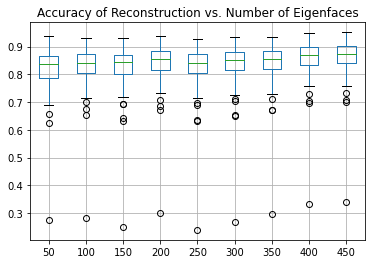

In [55]:
plt.title("Accuracy of Reconstruction vs. Number of Eigenfaces")
#plt.savefig("seprated.png", bbox_inches='tight')
accuracy_df.boxplot()

In [23]:
acc = accuracy_df

In [32]:
df = acc
for i in thelist:
  localmin = max(accuracies[i])
  df[i] = df[df[i] < localmin]
  print(localmin)

0.7231830243394953
0.7176936975483659
0.74950153620418
0.7003420821656268
0.7605797365212389
0.7334656637409731
0.7049789194429472
0.6678878098521769
0.6615861666919471


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


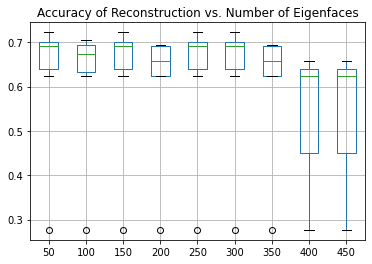

In [33]:
plt.title("Accuracy of Reconstruction vs. Number of Eigenfaces")
#plt.savefig("seprated.png", bbox_inches='tight')
df.boxplot()